In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250

In [25]:
sample_names = {
"hybr4_S8":"FFPE_3ng_A_1",
"hybr1_S1":"FFPE_3ng_A_2",
"hybr1_S2":"FFPE_3ng_A_3",
"hybr4_S9":"FFPE_3ng_A_4",
"hybr5_S10":"FFPE_3ng_B_1",
"hybr1_S4":"FFPE_3ng_B_2",
"hybr1_S5":"FFPE_3ng_C_1",
"hybr5_S11":"FFPE_3ng_C_2",
"hybr2_S6":"FFPE_3ng_S",
"hybr3_S7":"FFPE_100ng_S"}

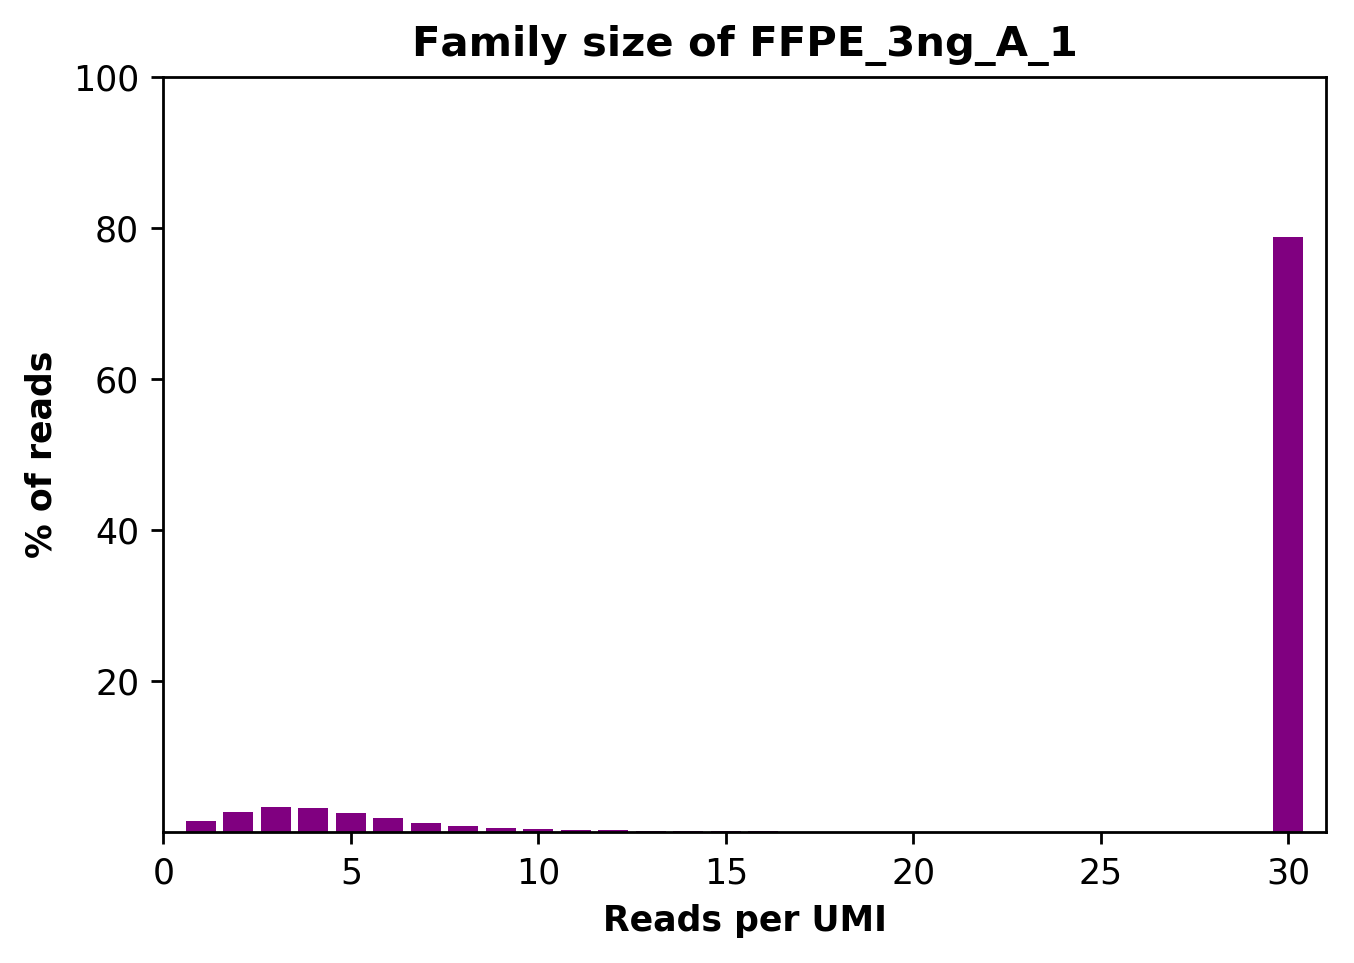

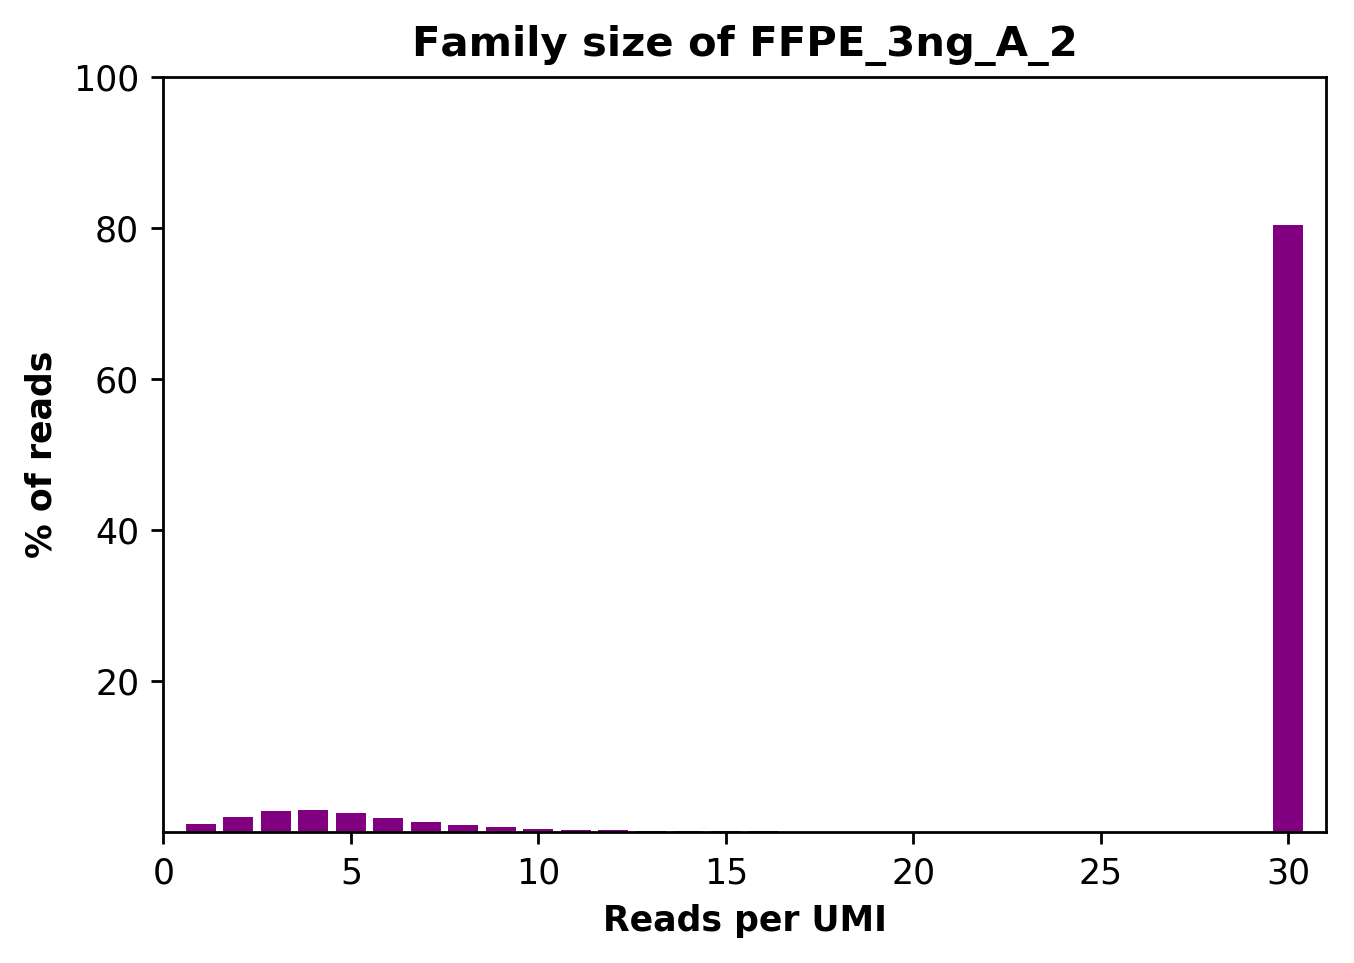

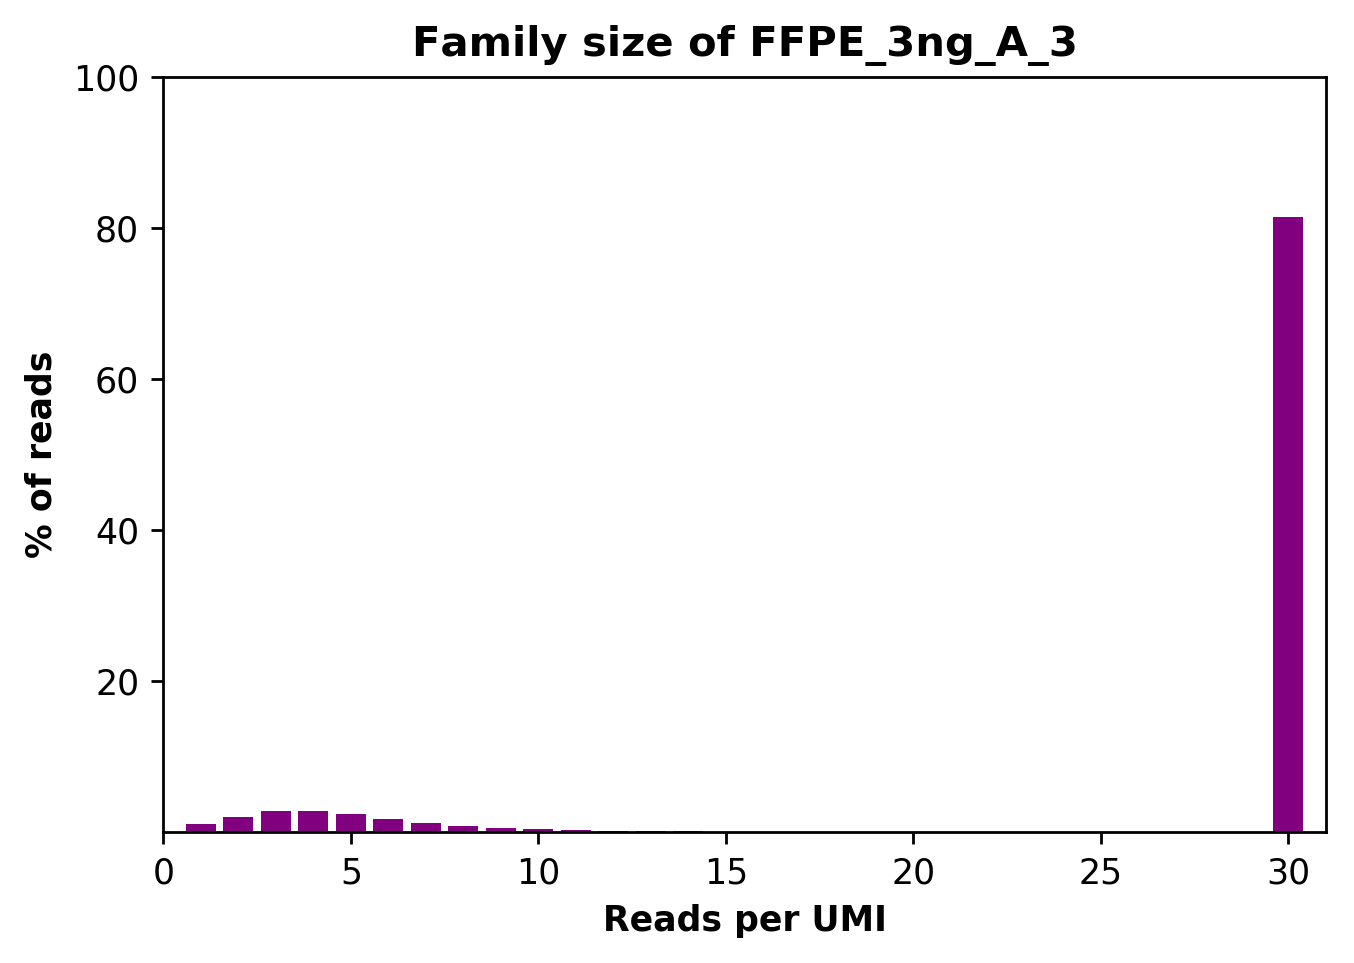

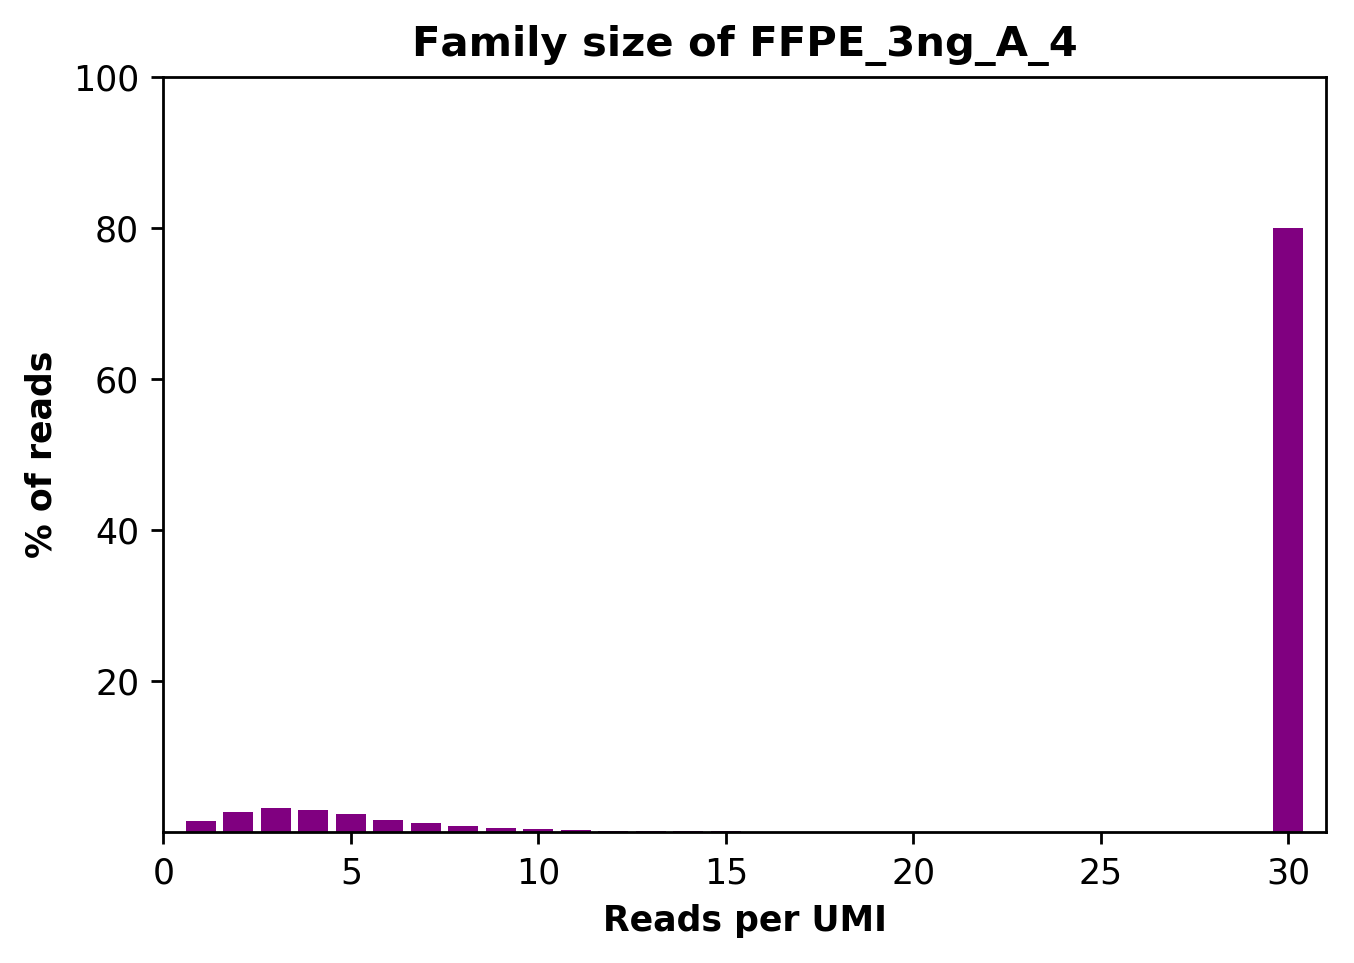

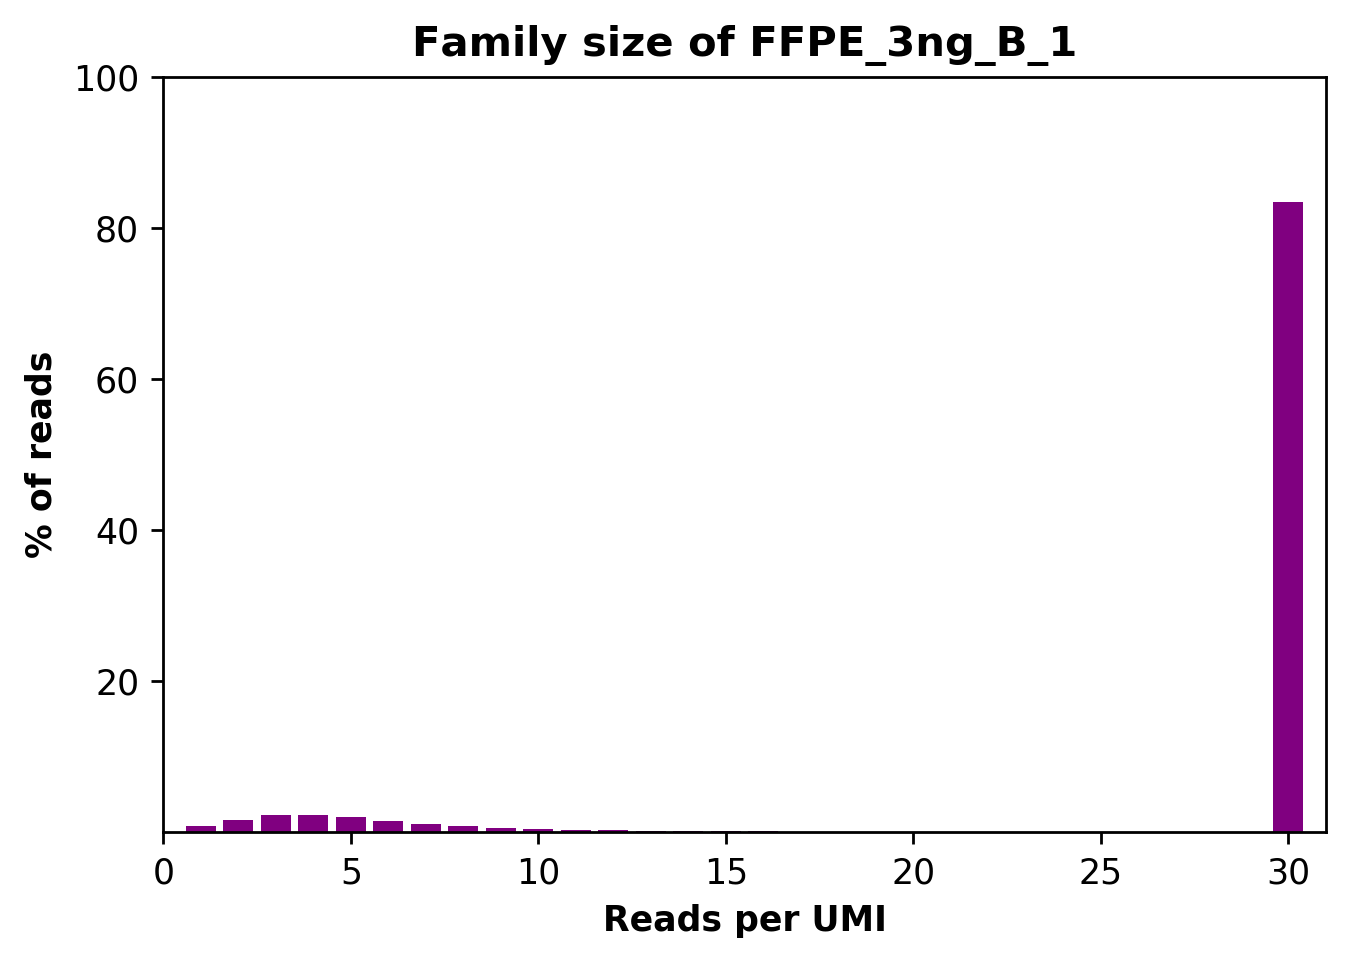

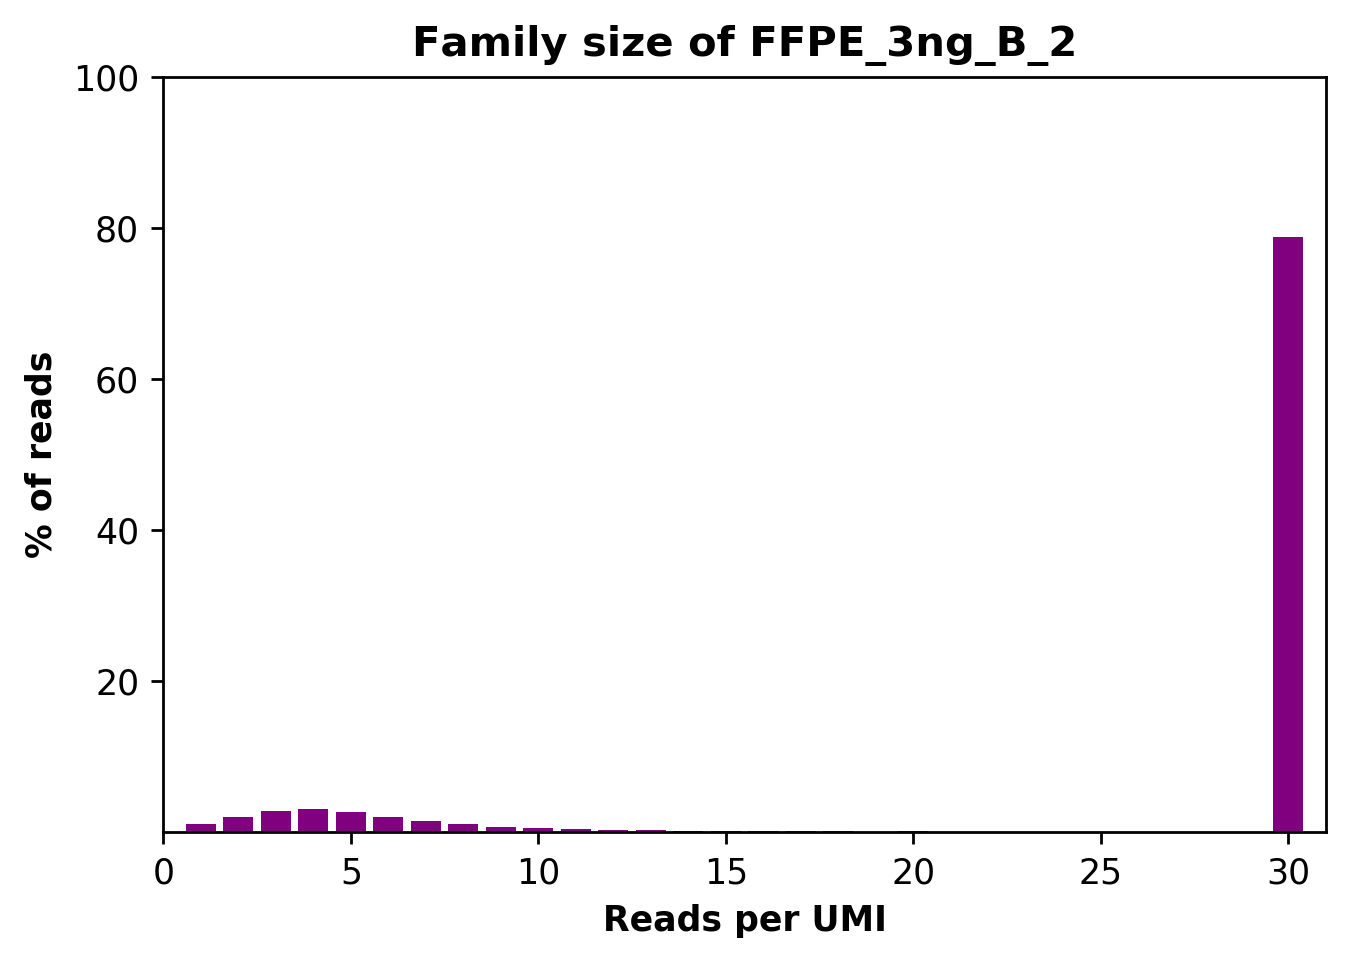

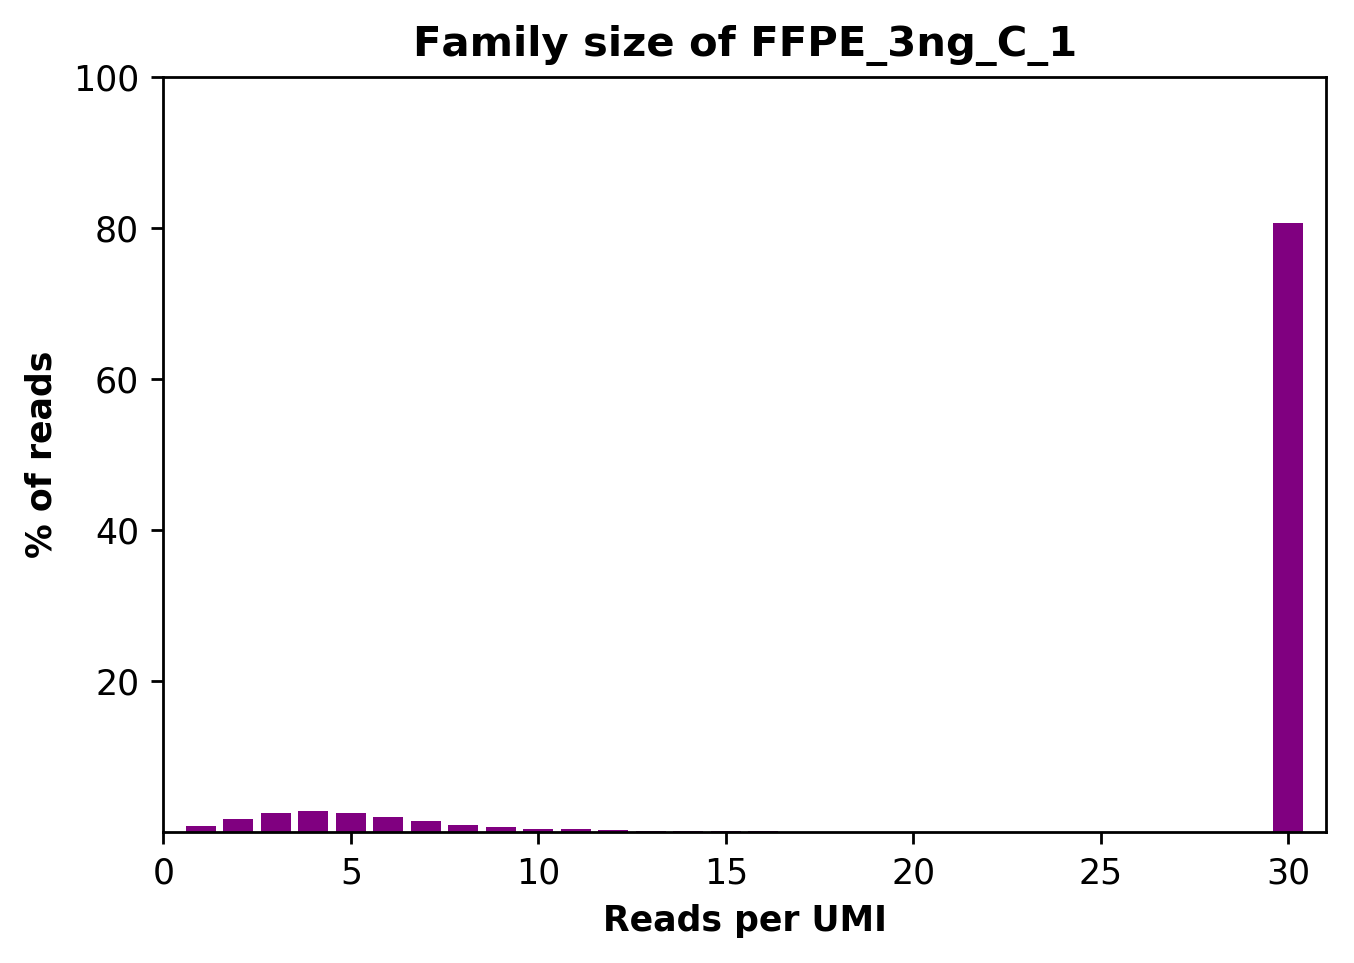

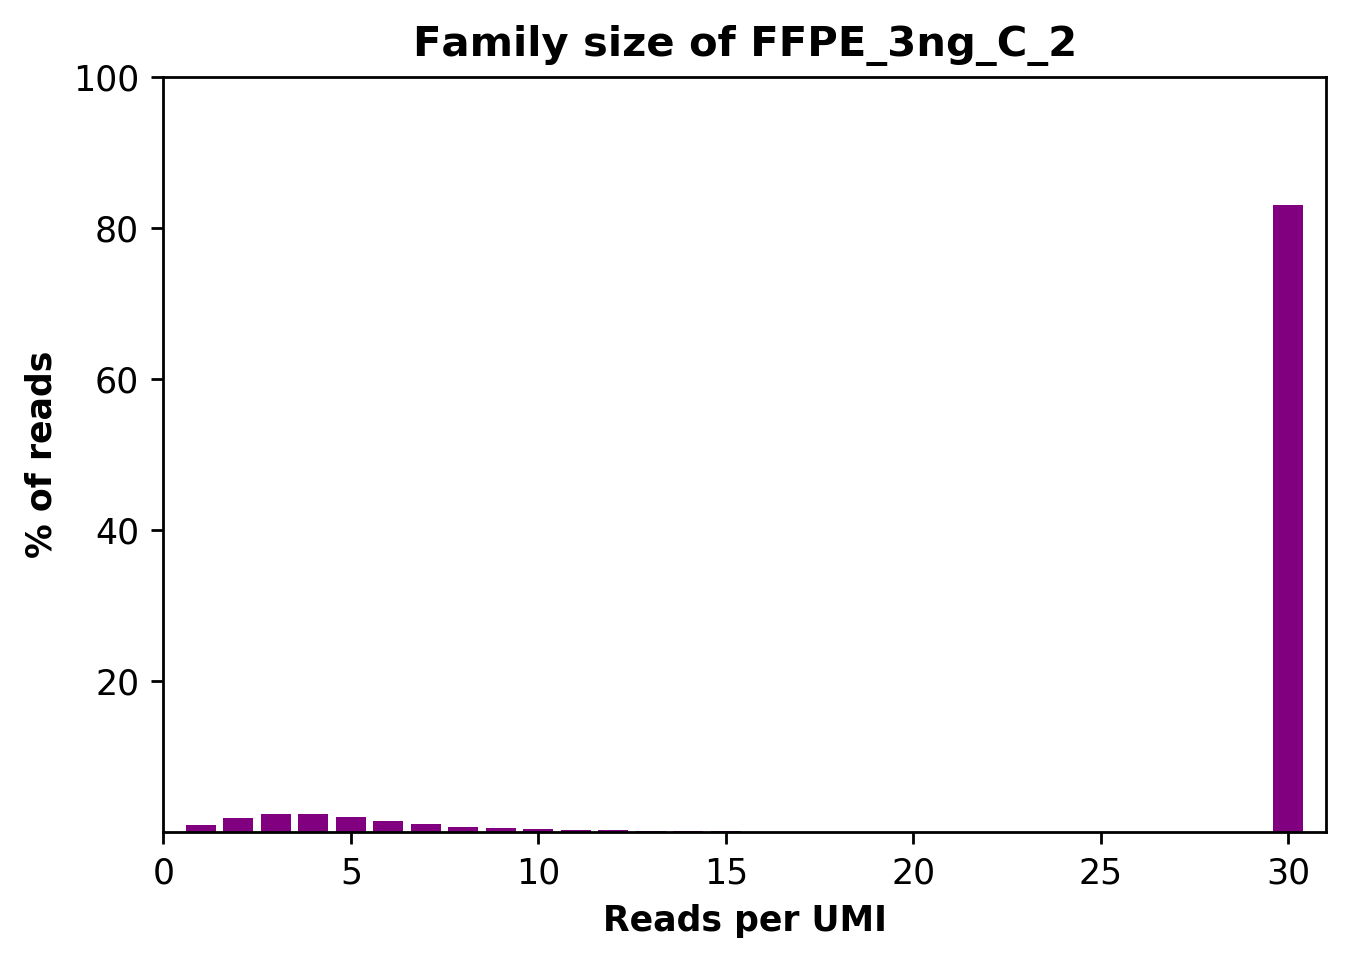

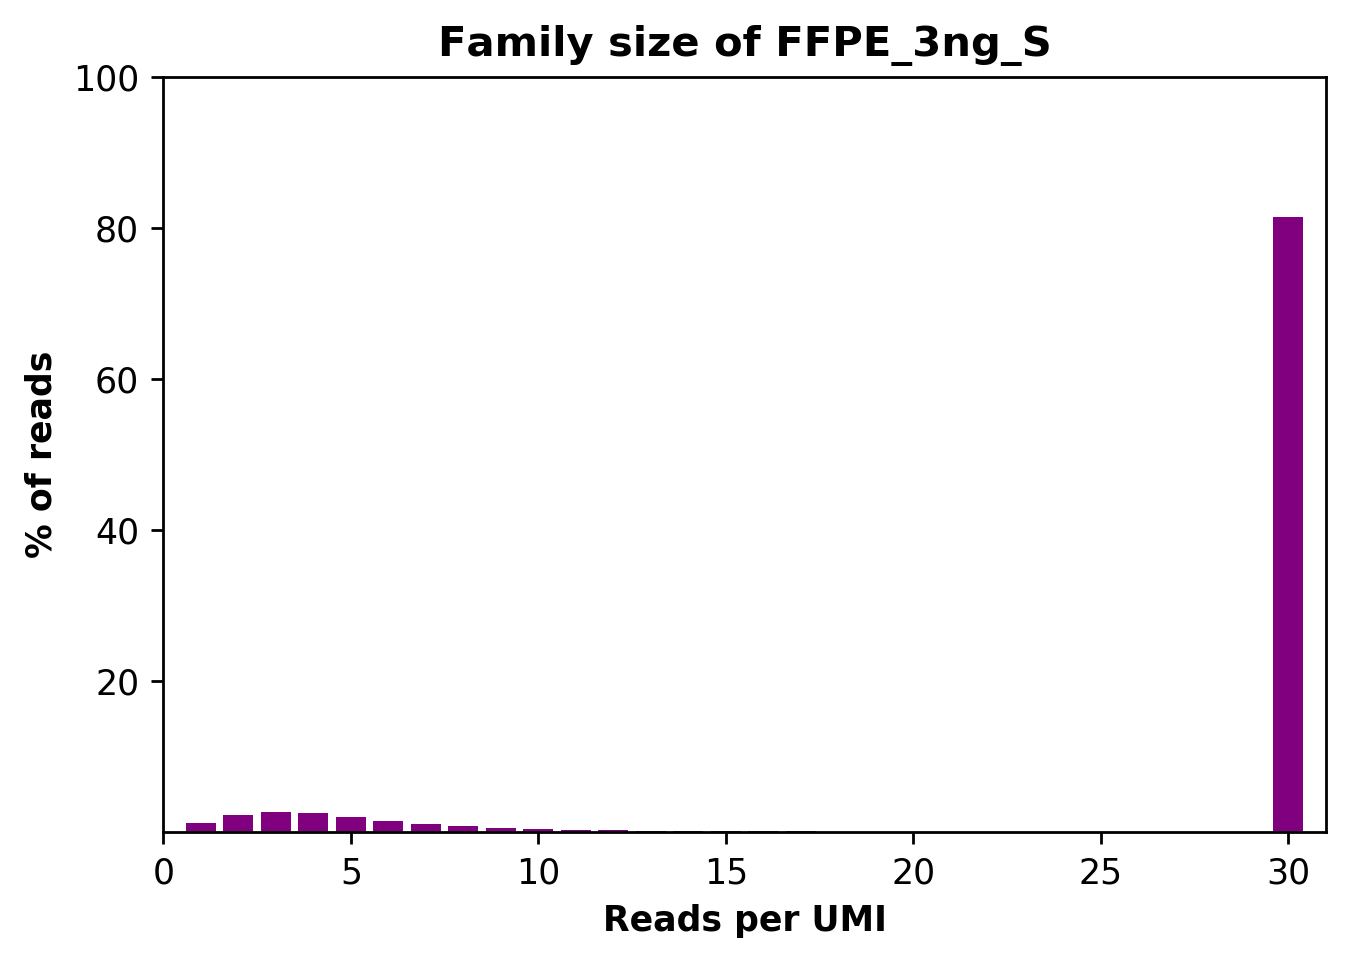

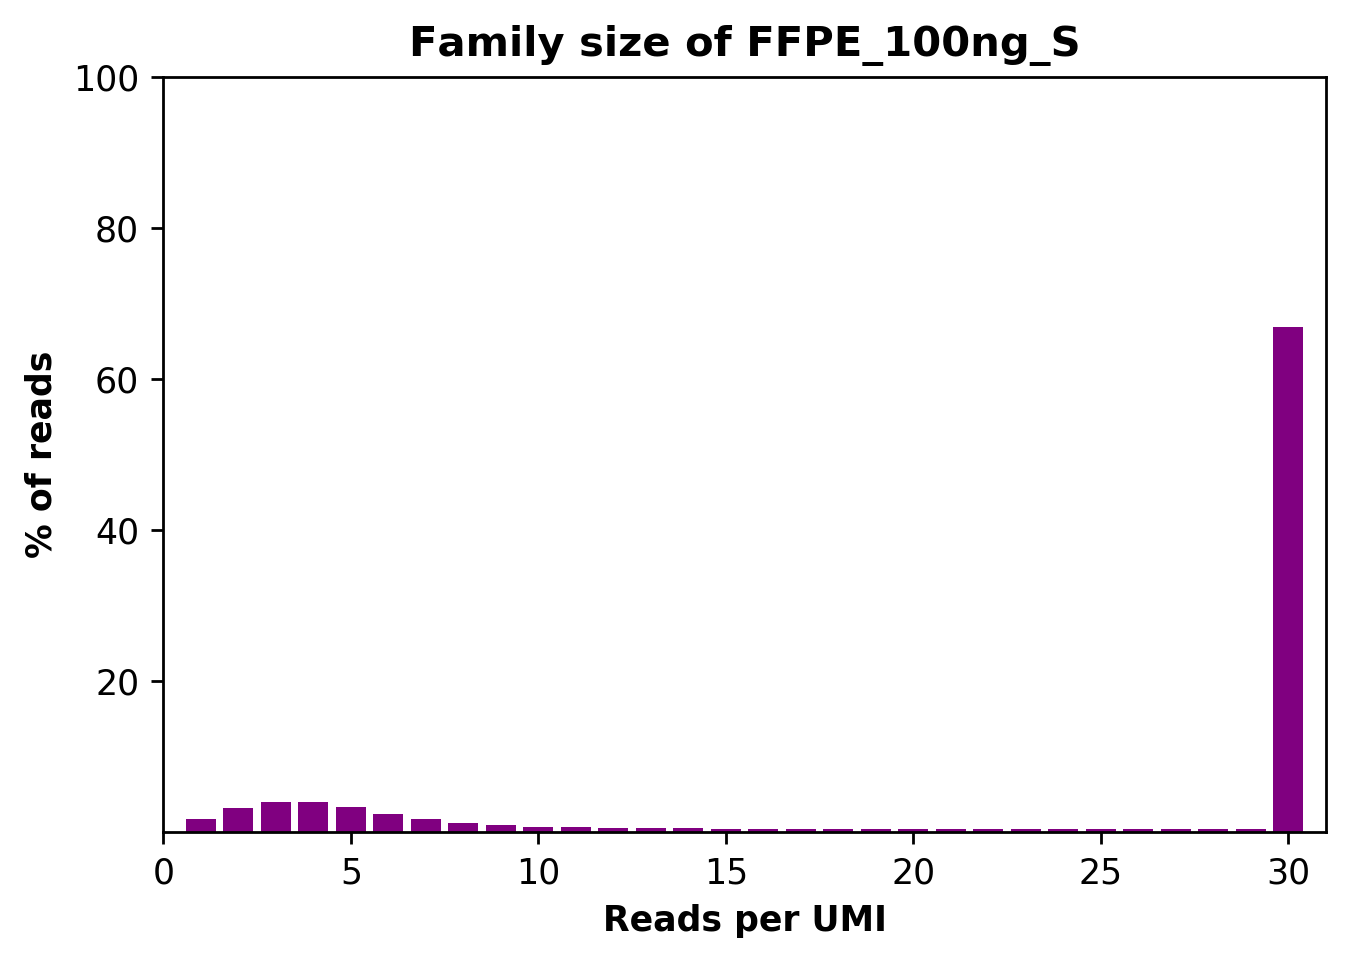

In [44]:
for ID in sample_names.keys():
    
    sample=pd.read_table('/Volumes/oncogxA/Dana/All_in_one_panel/metrics_2/{}.familysize.txt'.format(ID))
    sample['reads'] = sample['family_size']*sample['count']
    sample['frac_of_reads'] = 100*sample['reads']/sum(sample['reads'])
    sample['family_size'] = [30 if i >= 30 else i for i in sample['family_size']]
    sample = sample.groupby(by='family_size').sum()
    sample['family_size'] = sample.index
    plt.bar(x=sample['family_size'],
            height=sample['frac_of_reads'],
            color='purple')
    plt.xlim(0,31)
    plt.ylim(0.1,100)
    plt.xlabel('Reads per UMI',fontweight='bold')
    plt.ylabel('% of reads',fontweight='bold')
    plt.title('Family size of {}'.format(sample_names[ID]),fontweight='bold')
    plt.show()